In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv("updown.csv")
dataset.keys()

Index(['class', 'x1', 'y1', 'z1', 'v1', 'x2', 'y2', 'z2', 'v2', 'x3',
       ...
       'z31', 'v31', 'x32', 'y32', 'z32', 'v32', 'x33', 'y33', 'z33', 'v33'],
      dtype='object', length=133)

In [4]:
X=dataset.drop(['class'],axis=1)
y=dataset[['class']]
X.shape

(867, 132)

In [5]:
df2 = len(dataset[dataset["class"]=="up"])
df2

485

In [6]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca.shape

(867, 9)

In [7]:
X_pca

array([[ 0.65969881, -2.36896329, -0.67158403, ..., -0.76571181,
         0.07308414,  0.38547935],
       [ 0.79894281, -1.98078212, -0.72673855, ..., -1.00897975,
        -0.05780375,  0.41884909],
       [ 0.89651943, -1.07916191, -0.83512564, ..., -1.03918374,
        -0.04123234,  0.62874925],
       ...,
       [ 0.09808306,  2.66348079,  0.5845187 , ...,  1.14295593,
        -0.51984888,  0.37241161],
       [ 0.07298499,  2.71347342,  0.56907079, ...,  1.06604361,
        -0.48546987,  0.38722657],
       [-0.02578392,  2.77621935,  0.60347816, ...,  1.09674287,
        -0.44680813,  0.41503303]])

In [8]:
from sklearn.preprocessing import OrdinalEncoder
y_encoded = OrdinalEncoder().fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y_encoded,test_size=0.2)

In [10]:
import xgboost as xgb

In [11]:
params = {"objective": "multi:softmax", "tree_method": "hist", "num_class": 2}
n = 1000

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

In [12]:
results['test-auc-mean'].max()

0.9989786578618081

In [13]:
m2_xgb = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 4, seed=1729)
m2_xgb.fit(X_train, y_train, eval_metric="auc", verbose = False, eval_set=[(X_test, y_test)])

C:\Users\sagar\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [14]:
y_predicted = m2_xgb.predict(X_test)

<module 'matplotlib.pyplot' from 'C:\\Users\\sagar\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

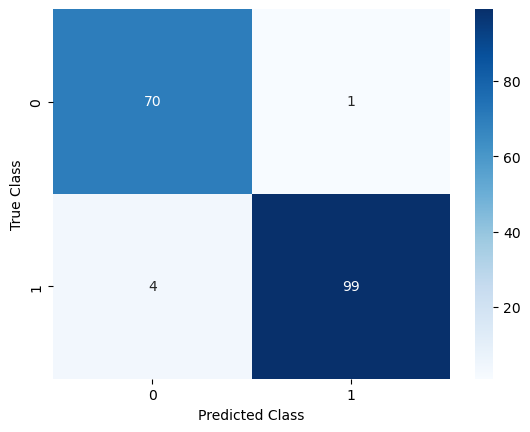

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt

In [16]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time m2_xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

[0]	validation_0-auc:0.97037	validation_0-error:0.03752	validation_1-auc:0.95980	validation_1-error:0.06897
[1]	validation_0-auc:0.98406	validation_0-error:0.03030	validation_1-auc:0.96376	validation_1-error:0.06322
[2]	validation_0-auc:0.99431	validation_0-error:0.02742	validation_1-auc:0.98140	validation_1-error:0.05172
[3]	validation_0-auc:0.99910	validation_0-error:0.02309	validation_1-auc:0.98790	validation_1-error:0.05172
[4]	validation_0-auc:0.99963	validation_0-error:0.01154	validation_1-auc:0.99002	validation_1-error:0.05172
[5]	validation_0-auc:0.99989	validation_0-error:0.00577	validation_1-auc:0.99275	validation_1-error:0.04598
[6]	validation_0-auc:0.99997	validation_0-error:0.00289	validation_1-auc:0.99330	validation_1-error:0.03448
[7]	validation_0-auc:0.99998	validation_0-error:0.00144	validation_1-auc:0.99316	validation_1-error:0.03448
[8]	validation_0-auc:1.00000	validation_0-error:0.00144	validation_1-auc:0.99316	validation_1-error:0.03448
[9]	validation_0-auc:1.00000

C:\Users\sagar\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[56]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[57]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[58]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[59]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[60]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[61]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[62]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[63]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[64]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99631	validation_1-error:0.02299
[65]	validation_0-a

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [17]:
result = m2_xgb.evals_result()
epochs = len(result['validation_0']['error'])
x_axis = range(0, epochs)

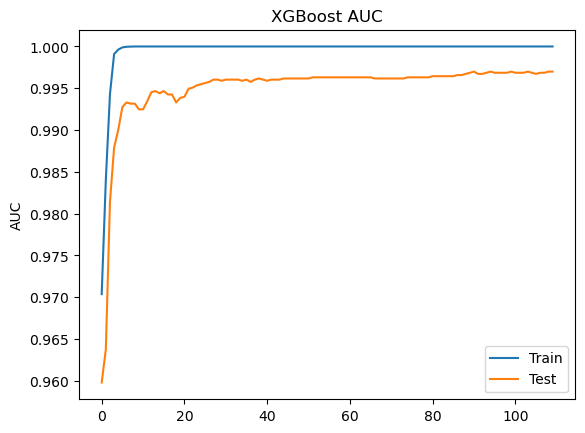

In [18]:
import matplotlib.pyplot as pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, result['validation_0']['auc'], label='Train')
ax.plot(x_axis, result['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

In [32]:
predictions = m2_xgb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9712643678160919

In [36]:
y

,class
0,up
1,up
2,up
3,up
4,up
...,...
862,up
863,up
864,up
865,up


In [37]:
y_encoded

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],